# Flight Price Prediction

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [92]:
#We must use read_excel file specify the sheet name if you have mutiple sheets
df = pd.read_excel('Data_Train.xlsx',sheet_name='Sheet1')

In [93]:
#Removing the Jet Airways since it is not available
df = df[df['Airline'] != 'Jet Airways']
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
...,...,...,...,...,...,...,...,...,...,...,...
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [94]:
#To display the feature names
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [95]:
#To display 5 top records
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873


In [96]:
#To check the null values in each features
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [97]:
#Indentifying which row record was null
df[df['Total_Stops'].isnull() ==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [98]:
#To check the datatypes of each feature
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [99]:
#To check the information of all the feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6834 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          6834 non-null   object
 1   Date_of_Journey  6834 non-null   object
 2   Source           6834 non-null   object
 3   Destination      6834 non-null   object
 4   Route            6833 non-null   object
 5   Dep_Time         6834 non-null   object
 6   Arrival_Time     6834 non-null   object
 7   Duration         6834 non-null   object
 8   Total_Stops      6833 non-null   object
 9   Additional_Info  6834 non-null   object
 10  Price            6834 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 640.7+ KB


In [100]:
#count of each category
df['Duration'].value_counts()

2h 50m     550
2h 35m     329
2h 45m     294
1h 30m     264
2h 55m     239
          ... 
21h 40m      1
25h          1
11h 25m      1
11h 55m      1
23h 45m      1
Name: Duration, Length: 310, dtype: int64

In [101]:
#unique values 
df['Duration'].unique

<bound method Series.unique of 0        2h 50m
1        7h 25m
3        5h 25m
4        4h 45m
5        2h 25m
          ...  
10677    2h 40m
10678    2h 30m
10679    2h 35m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 6834, dtype: object>

In [102]:
df.shape

(6834, 11)

In [103]:
#dropping the null values
df.dropna(inplace=True)

In [104]:
#checking the shape after dropping the nan values
df.shape

(6833, 11)

In [105]:
#null values are dropped
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [106]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

# EDA

Since we have the Date_of_Journey in object datatype we must convert this feature into timestamp for prediction using pd.to_datetime


.dt.day method will extract day information in date


.dt.month method will extract month information in date

In [107]:
df["Journey_day"]=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day
df["Journey_month"]=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month
df["Journey_year"]=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.year

In [108]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019


In [109]:
#since we have extracted the Date_of_Journey feature information we can drop it
df.drop(columns=['Date_of_Journey'],inplace=True)

In [110]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019


In [111]:
#Now we take Dep_Time feature
#Extracting hour information
df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
#Extracting minute information
df['Dep_minute'] = pd.to_datetime(df.Dep_Time).dt.minute

In [112]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019,9,0


In [113]:
#Now we drop Dep_Time feature from the data
df.drop(columns=['Dep_Time'],inplace=True)

In [114]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,11:25,2h 25m,non-stop,No info,3873,24,6,2019,9,0


In [115]:
#We apply the same concept on Arrival_Time feature 
#Extracting hour information
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
#Extracting minute information
df['Arrival_minute'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [116]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,11:25,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25


In [117]:
#Now we drop Dep_Time feature from the data
df.drop(columns=['Arrival_Time'],inplace=True)

In [118]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25


In [119]:
#Extracting the int from Duration columns
j=[]
for i in df['Duration']:
    j.append(i.split(' '))

In [120]:
m=[]
h=[]
for a in j:
    if len(a)>1:
        m.append(int(a[0][0:-1:1]))
        h.append(int(a[1][0:-1:1]))
    else:
        m.append(a[0][0:-1:1])
        h.append(0)

In [121]:
#Storing the value in other dataframe
df1=pd.DataFrame({'Duration_hour':m,'Duration_min':h})
df1

,Duration_hour,Duration_min
0,2,50
1,7,25
2,5,25
3,4,45
4,2,25
...,...,...
6828,2,40
6829,2,30
6830,2,35
6831,2,40


In [122]:
#Adding the details
df['Duration_hour'] = df1['Duration_hour'].values
df['Duration_min'] = df1['Duration_min'].values

In [123]:
df.head(150)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Air India,Delhi,Cochin,DEL → CCU → BOM → COK,28h 50m,2 stops,No info,13591,6,6,2019,14,25,19,15,28,50
227,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3943,27,4,2019,23,30,2,20,2,50
228,SpiceJet,Mumbai,Hyderabad,BOM → HYD,1h 30m,non-stop,No check-in baggage included,1965,21,5,2019,5,45,7,15,1,30
230,Air India,Kolkata,Banglore,CCU → BOM → BLR,25h 40m,1 stop,No info,14641,24,3,2019,16,50,18,30,25,40


In [124]:
#Dropping the Duration feature 
df.drop(columns=['Duration'],inplace=True)

In [125]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25


# Handling categorical variable


In [126]:
df['Airline'].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [127]:
#checking the count of each Airline
df['Airline'].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [128]:
#Arranging the data in the Descending order....(Airline Having highest price)
df.sort_values('Price',ascending=False)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,2019,5,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,1,3,2019,5,45,12,25,6,40
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,2019,9,45,14,25,4,40
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,2 stops,No info,52285,6,3,2019,20,5,4,25,8,20
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,52229,1,3,2019,5,45,10,45,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No check-in baggage included,1965,9,5,2019,5,45,7,15,1,30
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,2019,5,45,7,5,1,20
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,21,3,2019,22,45,0,10,1,25
4274,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,2019,22,45,0,10,1,25


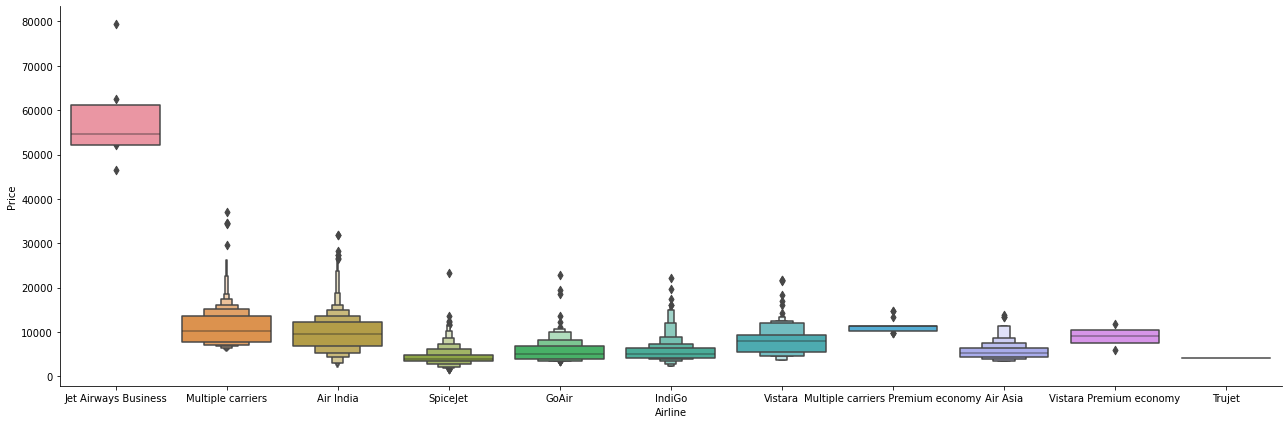

In [129]:
#checking the Airlines with Price
sn.catplot(y='Price',x='Airline',data = df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [130]:
#Since Airline is Nominal categorical Data we go with OneHotencoding
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0


In [131]:
df['Source'].value_counts()

Delhi       2950
Kolkata     1615
Banglore    1409
Mumbai       478
Chennai      381
Name: Source, dtype: int64

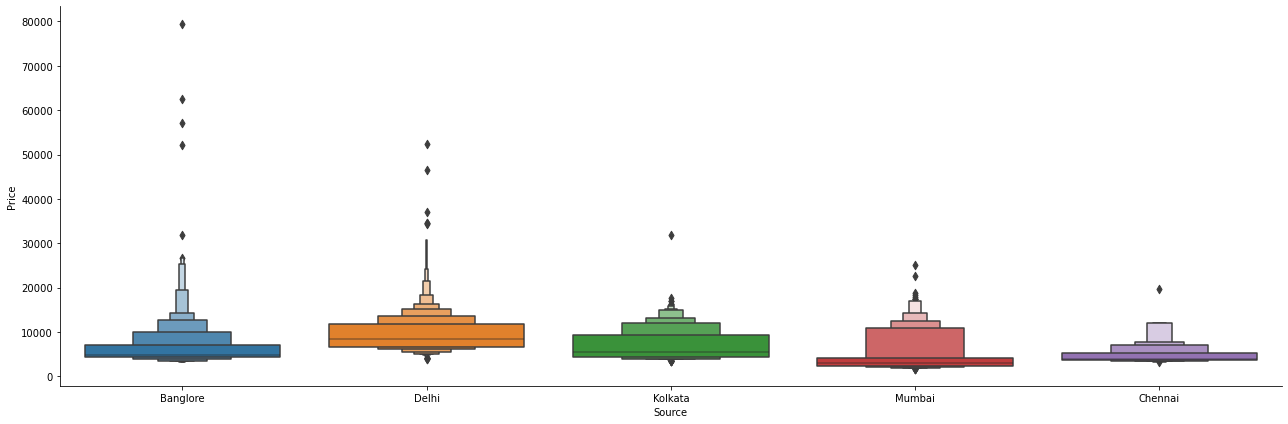

In [132]:
# Price for Source feature
sn.catplot(y='Price',x='Source',data = df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [133]:
#Since Source feature is Nominal categorical Data we go with OneHotencoding
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [134]:
df['Destination'].value_counts()

Cochin       2950
Banglore     1615
Delhi         895
New Delhi     514
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

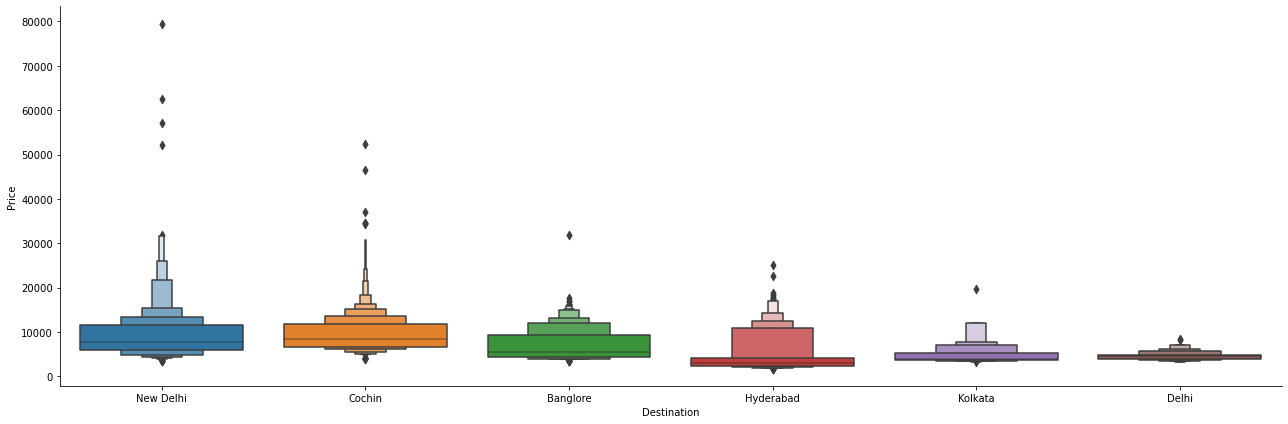

In [135]:
# Price for Destination feature
sn.catplot(y='Price',x='Destination',data = df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [136]:
#Since Destination feature is Nominal categorical Data we go with OneHotencoding
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


In [137]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
3              CCU → NAG → BLR
4              BLR → NAG → DEL
5                    CCU → BLR
                 ...          
10677                BLR → DEL
10678                CCU → BLR
10679                CCU → BLR
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 6833, dtype: object

In [138]:
#We can drop the Route Feature
df.drop(columns=['Route'],inplace=True)

In [139]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25


In [140]:
df['Total_Stops'].value_counts()

1 stop      3090
non-stop    2868
2 stops      829
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [141]:
#As Total_Stops feature is a Ordinal data we must definitely use Labelencoder which has directed impact on the Price
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [142]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,No info,3873,24,6,2019,9,0,11,25,2,25


In [143]:
data = pd.concat([df,Airline,Source,Destination],axis=1)

In [144]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,...,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,...,0,0,0,0,0,0,0,0,0,1
5,SpiceJet,Kolkata,Banglore,0,No info,3873,24,6,2019,9,...,0,0,0,1,0,0,0,0,0,0


In [145]:
#Dropping the Airline,Source,Destination features 
data.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)

In [56]:
data

,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,No info,3897,24,3,2019,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,No info,7662,1,5,2019,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
3,1,No info,6218,12,5,2019,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,No info,13302,1,3,2019,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
5,0,No info,3873,24,6,2019,9,0,11,25,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,No check-in baggage included,3257,21,5,2019,5,55,8,35,...,0,0,0,0,0,0,1,0,0,0
10678,0,No info,4107,9,4,2019,19,55,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,0,No info,4145,27,4,2019,20,45,23,20,...,0,0,0,1,0,0,0,0,0,0
10681,0,No info,12648,1,3,2019,11,30,14,10,...,0,0,0,0,0,0,0,0,0,1


In [146]:
data.drop(columns=['Additional_Info','Journey_year'],inplace=True)

In [147]:
data.shape

(6833, 29)

In [148]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

# Preprocessing Test Data

In [149]:
#following the same  method as the previous steps 

In [150]:
df = pd.read_excel(r'Test_set.xlsx')
df = df[df['Airline'] != 'Jet Airways']
df.isnull().sum()
df.dropna(inplace=True)
df["Journey_day"]=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day
df["Journey_month"]=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month
df["Journey_year"]=pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.year
df.drop(columns=['Date_of_Journey'],inplace=True)
df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
#Extracting minute information
df['Dep_minute'] = pd.to_datetime(df.Dep_Time).dt.minute
df.drop(columns=['Dep_Time'],inplace=True)
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
#Extracting minute information
df['Arrival_minute'] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(columns=['Arrival_Time'],inplace=True)
j=[]
for i in df['Duration']:
    j.append(i.split(' '))
m=[]
h=[]
for a in j:
    if len(a)>1:
        m.append(int(a[0][0:-1:1]))
        h.append(int(a[1][0:-1:1]))
    else:
        m.append(a[0][0:-1:1])
        h.append(0)
df1=pd.DataFrame({'Duration_hour':m,'Duration_min':h})


df['Duration_hour'] = df1['Duration_hour'].values
df['Duration_min'] = df1['Duration_min'].values
df.drop(columns=['Duration'],inplace=True)

Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()


Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()



#Since Destination feature is Nominal categorical Data we go with OneHotencoding
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()




df.drop(columns=['Route'],inplace=True)
df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


test_data = pd.concat([df,Airline,Source,Destination],axis=1)

test_data.drop(columns=['Airline','Source','Destination'],axis=1,inplace=True)
test_data.drop(columns=['Additional_Info','Journey_year'],inplace=True)


In [151]:
len(test_data.columns)

27

In [152]:
len(data.columns)

29

In [153]:
data

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
5,0,3873,24,6,9,0,11,25,2,25,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,3257,21,5,5,55,8,35,2,40,...,0,0,0,0,0,0,1,0,0,0
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


# Feature Selection

#feature selection can done using
1.Heatmap
2.SelectKBest
3.feature_importance

In [154]:
data.shape

(6833, 29)

In [155]:
test_data.shape

(1774, 27)

In [192]:
#independent feature
X = data.loc[:,['Total_Stops' , 'Journey_day', 'Journey_month', 
       'Dep_hour', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hour', 'Duration_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
5,0,24,6,9,0,11,25,2,25,0,...,0,0,0,1,0,0,0,0,0,0


In [193]:
data.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.630217,-0.033906,0.031997,-0.144921,-0.015866,0.127580,-0.156057,-0.241674,0.439110,...,-0.021466,-0.248893,0.485389,0.027598,-0.206130,0.485389,-0.397639,-0.206130,-0.248893,-0.031480
Price,0.630217,1.000000,-0.167781,-0.143089,-0.113195,-0.063325,0.084815,-0.091786,-0.176140,0.277594,...,0.006633,-0.167063,0.369699,-0.064113,-0.206064,0.369699,-0.282842,-0.206064,-0.167063,0.115411
Journey_day,-0.033906,-0.167781,1.000000,-0.013649,0.001125,-0.015388,-0.005662,-0.031205,-0.015920,-0.050134,...,-0.025143,0.005139,0.083237,-0.036763,-0.029979,0.083237,-0.002741,-0.029979,0.005139,-0.069071
Journey_month,0.031997,-0.143089,-0.013649,1.000000,0.029196,-0.026614,-0.007767,-0.080140,-0.056805,-0.034340,...,-0.023609,0.017879,0.105334,0.055129,-0.039935,0.105334,0.108419,-0.039935,0.017879,-0.402232
Dep_hour,-0.144921,-0.113195,0.001125,0.029196,1.000000,-0.073568,-0.023646,0.124091,0.014842,0.033605,...,-0.002464,0.002051,-0.174539,0.148272,0.055314,-0.174539,0.041685,0.055314,0.002051,-0.019653
Dep_minute,-0.015866,-0.063325,-0.015388,-0.026614,-0.073568,1.000000,0.054016,-0.031667,0.137391,-0.049823,...,-0.013854,0.089310,-0.074218,-0.011474,0.024840,-0.074218,-0.004811,0.024840,0.089310,0.062295
Arrival_hour,0.127580,0.084815,-0.005662,-0.007767,-0.023646,0.054016,1.000000,-0.144051,-0.129532,0.101326,...,0.000517,-0.022696,0.082635,0.002332,-0.021342,0.082635,-0.105474,-0.021342,-0.022696,0.016361
Arrival_minute,-0.156057,-0.091786,-0.031205,-0.080140,0.124091,-0.031667,-0.144051,1.000000,0.191157,0.055322,...,-0.000511,-0.048674,-0.300552,0.162466,0.093861,-0.300552,0.143611,0.093861,-0.048674,0.070604
Duration_min,-0.241674,-0.176140,-0.015920,-0.056805,0.014842,0.137391,-0.129532,0.191157,1.000000,-0.084182,...,0.005037,-0.144950,-0.272415,0.011399,-0.043614,-0.272415,0.393503,-0.043614,-0.144950,0.158152
Airline_Air India,0.439110,0.277594,-0.050134,-0.034340,0.033605,-0.049823,0.101326,0.055322,-0.084182,1.000000,...,-0.012302,-0.106116,-0.006738,0.077443,0.017755,-0.006738,-0.108652,0.017755,-0.106116,0.102041


In [194]:
#Dependent feature
y = data.iloc[:,1]
y.head()

0     3897
1     7662
3     6218
4    13302
5     3873
Name: Price, dtype: int64

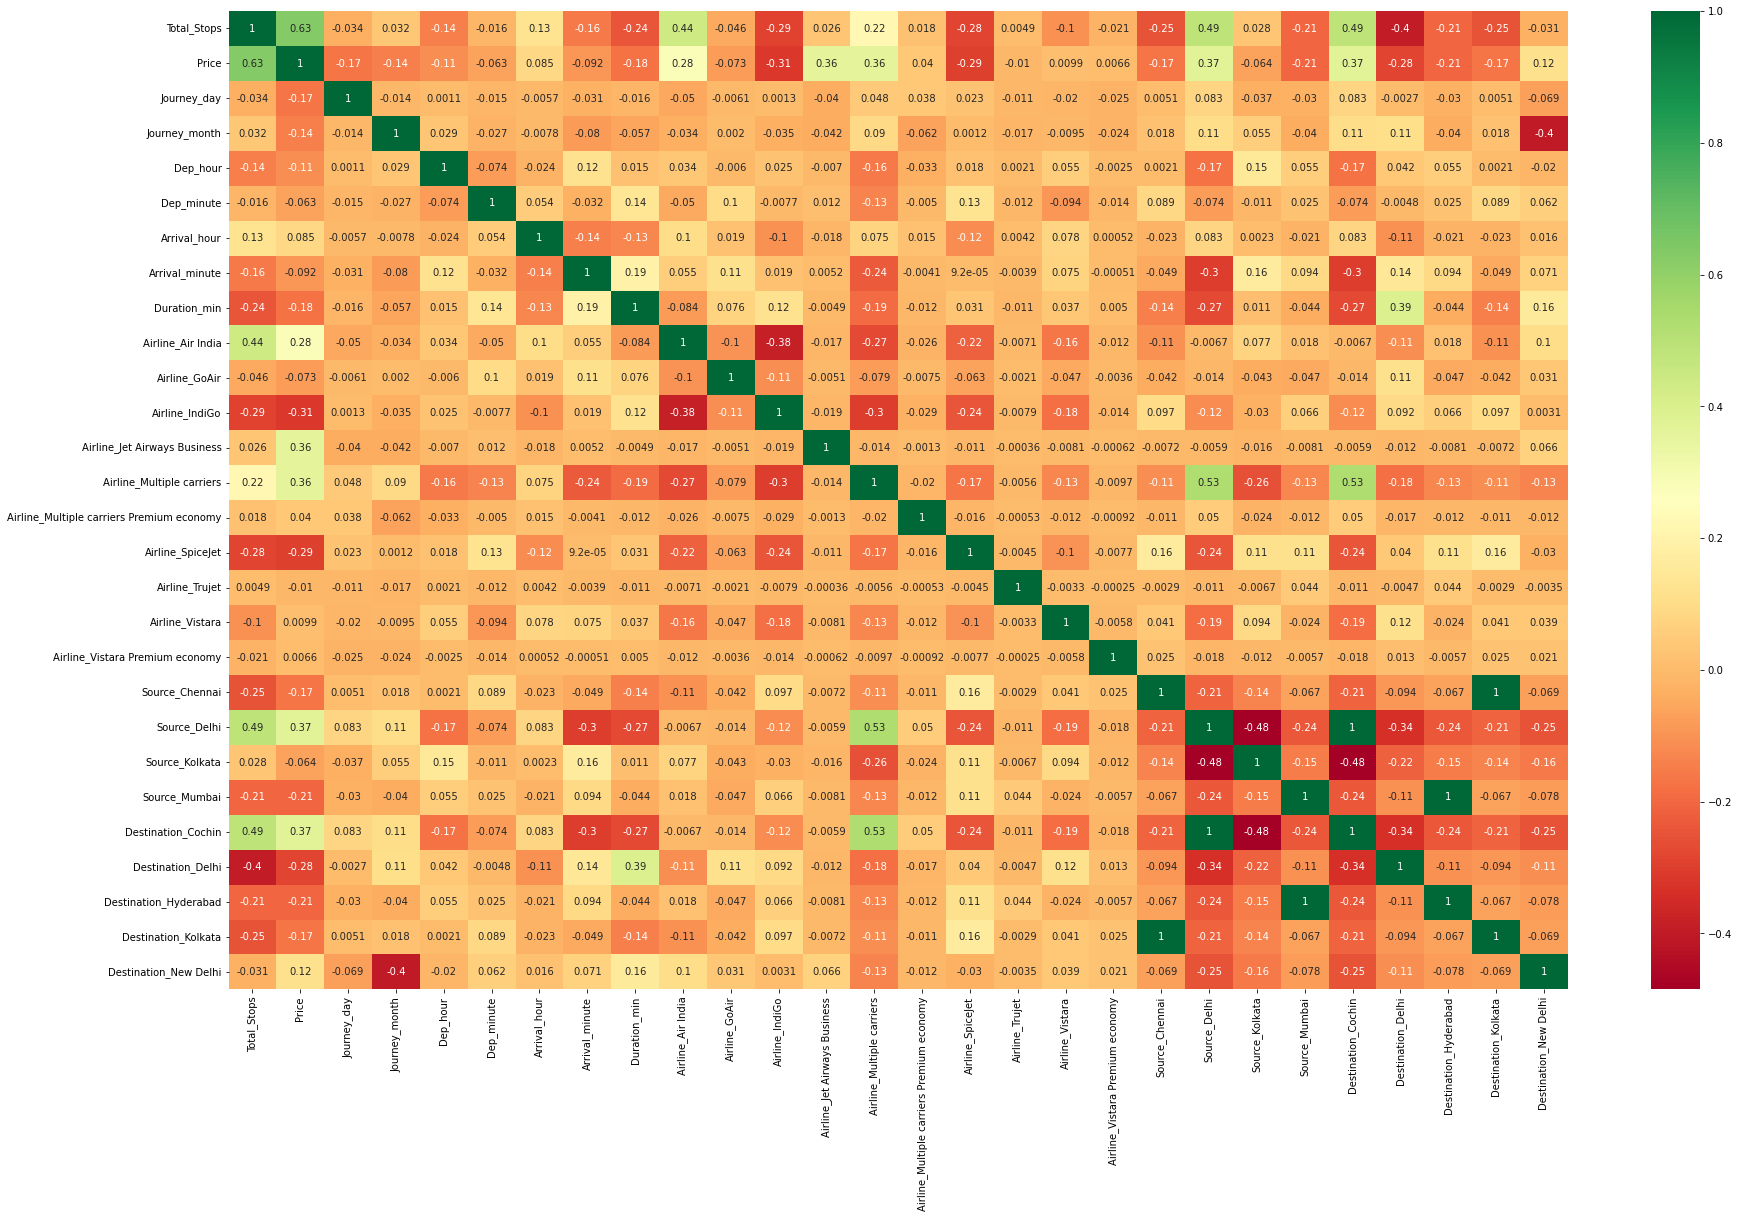

In [195]:
#Finding correlation betweeen independent and dependent feature
plt.figure(figsize=(30,18))
sn.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [196]:
#Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)


ExtraTreesRegressor()

In [197]:
print(selection.feature_importances_)

[2.51296342e-01 1.03267822e-01 6.38911229e-02 3.00052554e-02
 2.90985294e-02 2.84485408e-02 2.47974251e-02 1.17069492e-01
 2.28431384e-02 2.11779940e-02 3.11624119e-03 3.13733532e-02
 1.28143311e-01 3.53069378e-02 1.62757376e-03 5.61003956e-03
 2.05347224e-04 1.01256079e-02 1.76915363e-04 8.52282738e-04
 2.76007477e-02 4.95730784e-03 3.62158053e-03 2.86361111e-02
 1.26619721e-03 3.38660493e-03 9.36162431e-04 2.11620156e-02]


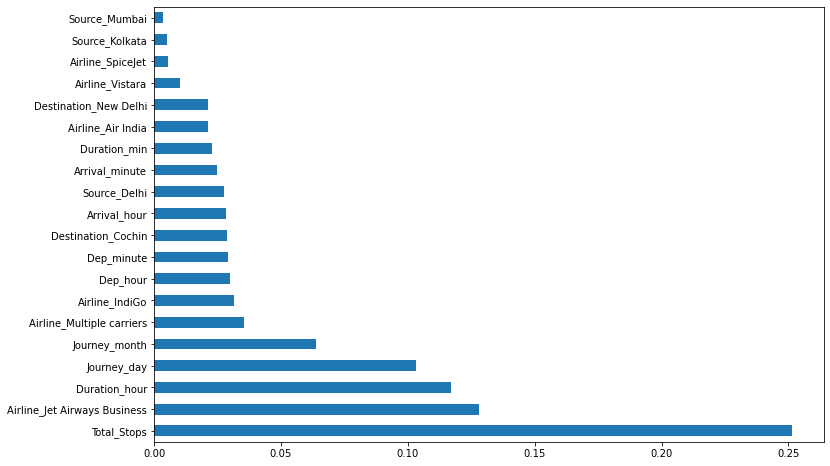

In [198]:
#plot graph of feature importance for better visulization
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [199]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [200]:
test_data.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_minute', 'Duration_hour', 'Duration_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

# Decision Tree Algorithm 

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [244]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [245]:
y_pred = model.predict(X_test)
y_pred

array([7005., 3841., 8656., ..., 9555., 4371., 9709.])

In [246]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,y_pred)

0.7584982430673087

In [247]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 864.9925351071691
MSE 3974185.756306972
RMSE 1993.5359932308652


<Figure size 144000x72000 with 0 Axes>

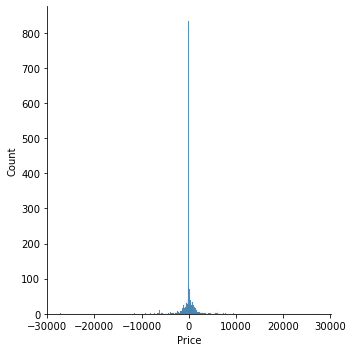

In [248]:
plt.figure(figsize=(2000,1000))
sn.displot(y_test-y_pred)
plt.show()

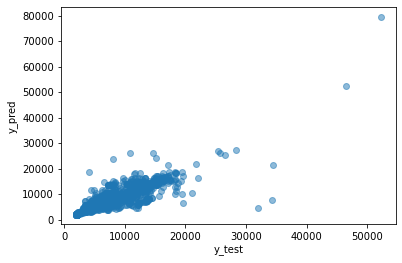

In [249]:
plt.scatter(y_test,y_pred,alpha =0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [250]:
# from sklearn import tree
# plt.figure(figsize=(20,7))
# tree.plot_tree(model,filled=True)

#    # Random Forest Algorithm

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [252]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)

RandomForestRegressor()

In [253]:
y_pred = model1.predict(X_test)
y_pred

array([7713.14666667, 4091.71133333, 9139.9225    , ..., 9050.75      ,
       4292.302     , 8458.14      ])

In [254]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,y_pred)

0.8442811128339263

In [255]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 757.3469244430366
MSE 2562531.1849630303
RMSE 1600.790799874559


<Figure size 144000x72000 with 0 Axes>

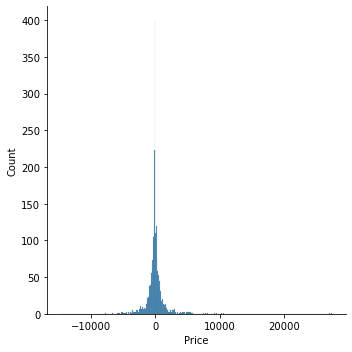

In [256]:
plt.figure(figsize=(2000,1000))
sn.displot(y_test-y_pred)
plt.show()

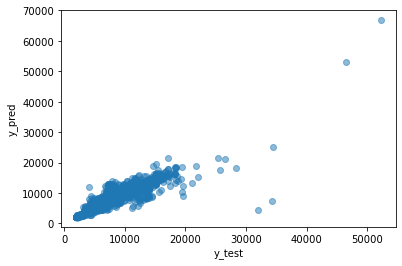

In [257]:
plt.scatter(y_test,y_pred,alpha =0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Pickle the Model

In [284]:
import pickle
with open('rf_pickle_file','wb') as f:
    pickle.dump(model1,f)

In [285]:
with open('rf_pickle_file','rb') as f:
    ob=pickle.load(f)

In [286]:
y_pred = ob.predict(X_test)

In [287]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,y_pred)

0.8442811128339263

In [288]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 757.3469244430366
MSE 2562531.1849630303
RMSE 1600.790799874559


In [296]:
#Prediction for single record
ob.predict([X_test.values[0]])

C:\Users\91986\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7713.14666667])

In [298]:
#Actual value
y_test.values[0]

7485